In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


{'AirPassengers (1).csv': b'Month,Passengers\r\n1949-01,112\r\n1949-02,118\r\n1949-03,132\r\n1949-04,129\r\n1949-05,121\r\n1949-06,135\r\n1949-07,148\r\n1949-08,148\r\n1949-09,136\r\n1949-10,119\r\n1949-11,104\r\n1949-12,118\r\n1950-01,115\r\n1950-02,126\r\n1950-03,141\r\n1950-04,135\r\n1950-05,125\r\n1950-06,149\r\n1950-07,170\r\n1950-08,170\r\n1950-09,158\r\n1950-10,133\r\n1950-11,114\r\n1950-12,140\r\n1951-01,145\r\n1951-02,150\r\n1951-03,178\r\n1951-04,163\r\n1951-05,172\r\n1951-06,178\r\n1951-07,199\r\n1951-08,199\r\n1951-09,184\r\n1951-10,162\r\n1951-11,146\r\n1951-12,166\r\n1952-01,171\r\n1952-02,180\r\n1952-03,193\r\n1952-04,181\r\n1952-05,183\r\n1952-06,218\r\n1952-07,230\r\n1952-08,242\r\n1952-09,209\r\n1952-10,191\r\n1952-11,172\r\n1952-12,194\r\n1953-01,196\r\n1953-02,196\r\n1953-03,236\r\n1953-04,235\r\n1953-05,229\r\n1953-06,243\r\n1953-07,264\r\n1953-08,272\r\n1953-09,237\r\n1953-10,211\r\n1953-11,180\r\n1953-12,201\r\n1954-01,204\r\n1954-02,188\r\n1954-03,235\r\n1954-04

In [3]:
df=pd.read_csv('AirPassengers.csv')

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [6]:
time_series_data = df['Month']

In [8]:
df['Month'] = pd.to_datetime(df['Month']) # Assuming your date/time column is called 'date_column'
df.set_index('Month', inplace=True)

In [10]:
time_series_data = df['Passengers']  # Now 'value' column is associated with a datetime index
result = adfuller(time_series_data)
# ... (rest of your ADF test code)

In [11]:
result = adfuller(time_series_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


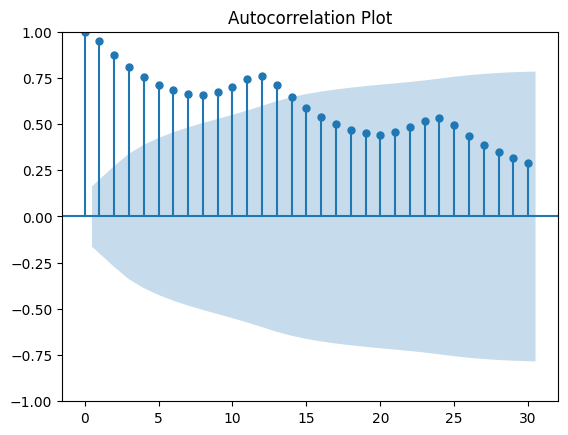

In [12]:
plot_acf(time_series_data, lags=30) # Adjust lags as needed
plt.title('Autocorrelation Plot')
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [14]:
time_series_data = df['Passengers']

In [15]:
train_data = time_series_data[:-30]  # Use the last 30 observations for testing
test_data = time_series_data[-30:]

In [16]:
model = ARIMA(train_data, order=(5, 1, 0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
model_fit = model.fit()

predictions on the test data

In [18]:
predictions = model_fit.predict(start=len(train_data), end=len(time_series_data)-1)

In [19]:
rmse = mean_squared_error(test_data, predictions, squared=False)
print('RMSE:', rmse)

RMSE: 82.03324382270571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluate the different types of error residues to
check fitness of good of the  model.

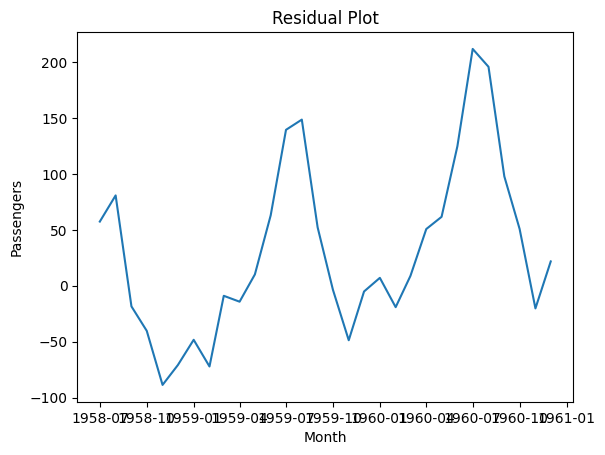

In [21]:
import matplotlib.pyplot as plt

residuals = test_data - predictions
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()


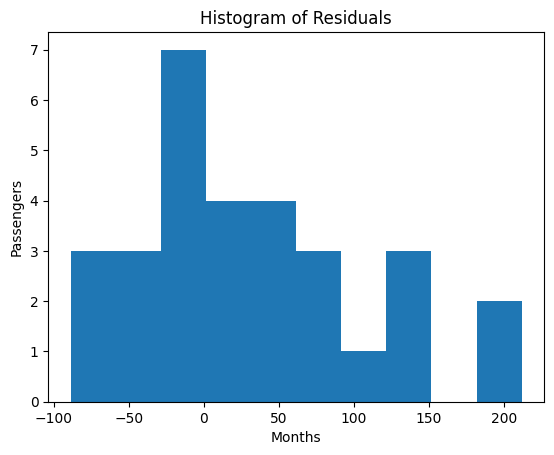

In [24]:
plt.hist(residuals)
plt.title('Histogram of Residuals')
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.show()

5. Forecast the predictions for next 5 years on  target variable.


In [25]:
forecast_horizon = 5 * 365
forecast = model_fit.predict(start=len(time_series_data), end=len(time_series_data) + forecast_horizon - 1)

In [30]:
from pandas.tseries.offsets import DateOffset
forecast_dates = pd.date_range(start=time_series_data.index[-1], periods=forecast_horizon + 1, freq='D')[1:]
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)

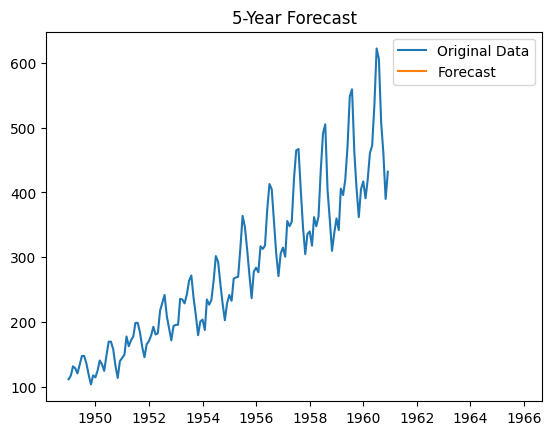

In [31]:
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast_df, label='Forecast')
plt.legend()
plt.title('5-Year Forecast')
plt.show()